In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/dsspam.csv",encoding="'latin1'")
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
data.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.rename(columns={'v1':'class','v2':'text'},inplace=True)
data.head()


,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()


,class,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.shape


(5572, 2)

In [ ]:
data.isnull().any()


class    False
text     False
dtype: bool

In [ ]:
data.isnull().sum()


class    0
text     0
dtype: int64

In [ ]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

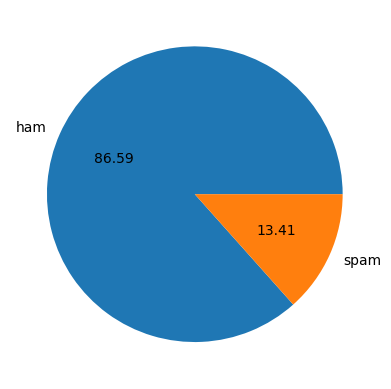

In [ ]:
plt.pie(data['class'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()


<Axes: xlabel='class', ylabel='count'>

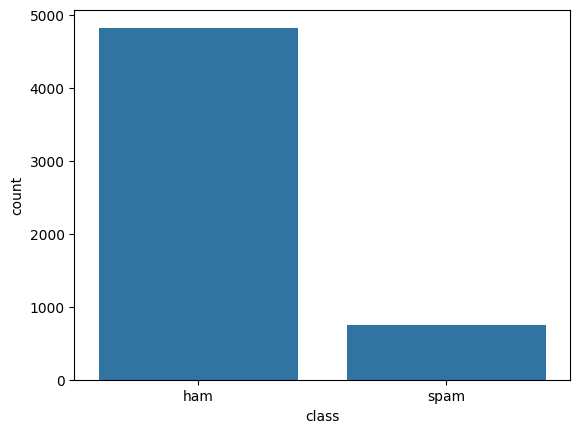

In [ ]:
sns.countplot(x = 'class', data = data)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()
data['class']=label_Encoder.fit_transform(data['class'])
data.head()


,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
import regex as re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()


,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
Transformed_text=[]
for i in range(0,5572):
  text=data["text"][i]

In [ ]:
text=re.sub('[^a-zA-Z]',' ',text)


In [ ]:
text=text.lower()


In [ ]:
text=text.split()


In [ ]:
ps=PorterStemmer()
text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]


In [ ]:
text=' '.join(text)
data.iloc[i,1]=text
data

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
X = data['text']
Y = data['class']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2,stratify = Y)

In [ ]:
from tqdm import tqdm
words_in_sent = []
for i in tqdm(x_train):
  words_in_sent.append(i.split())

100%|██████████| 5014/5014 [00:00<00:00, 178115.20it/s]


In [ ]:
print(words_in_sent)


[['Yo', 'carlos,', 'a', 'few', 'friends', 'are', 'already', 'asking', 'me', 'about', 'you,', 'you', 'working', 'at', 'all', 'this', 'weekend?'], ['I', 'anything', 'lor.'], ['Or', 'better', 'still', 'can', 'you', 'catch', 'her', 'and', 'let', 'ask', 'her', 'if', 'she', 'can', 'sell', '&lt;#&gt;', 'for', 'me.'], ['At', '7', 'we', 'will', 'go', 'ok', 'na.'], ['Freemsg:', '1-month', 'unlimited', 'free', 'calls!', 'Activate', 'SmartCall', 'Txt:', 'CALL', 'to', 'No:', '68866.', 'Subscriptn3gbp/wk', 'unlimited', 'calls', 'Help:', '08448714184', 'Stop?txt', 'stop', 'landlineonly'], ['You', 'will', 'be', 'in', 'the', 'place', 'of', 'that', 'man'], ['Got', 'smaller', 'capacity', 'one?', 'Quite', 'ex...'], ['Those', 'were', 'my', 'exact', 'intentions'], ['Today', 'is', '\\song', 'dedicated', 'day..\\"', 'Which', 'song', 'will', 'u', 'dedicate', 'for', 'me?', 'Send', 'this', 'to', 'all', 'ur', 'valuable', 'frnds', 'but', 'first', 'rply', 'me..."'], ['Oh', 'unintentionally', 'not', 'bad', 'timing.'

In [ ]:
from gensim.models import Word2Vec, FastText
word2vec_model = Word2Vec(sentences = words_in_sent,vector_size = 300,window = 5, workers = 2)
word2vec_model


In [ ]:
vocabulary = word2vec_model.wv.key_to_index
print(vocabulary)


{'to': 0, 'you': 1, 'I': 2, 'a': 3, 'the': 4, 'and': 5, 'in': 6, 'is': 7, 'i': 8, 'u': 9, 'for': 10, 'my': 11, 'of': 12, 'your': 13, 'me': 14, 'on': 15, 'have': 16, '2': 17, 'that': 18, 'it': 19, 'are': 20, 'or': 21, 'call': 22, 'be': 23, 'at': 24, 'not': 25, 'with': 26, 'will': 27, 'get': 28, 'so': 29, 'can': 30, 'U': 31, 'ur': 32, "I'm": 33, 'but': 34, '&lt;#&gt;': 35, 'You': 36, 'from': 37, 'do': 38, '4': 39, 'up': 40, 'if': 41, 'go': 42, '.': 43, 'just': 44, 'this': 45, 'when': 46, 'like': 47, 'know': 48, 'we': 49, 'all': 50, 'out': 51, 'got': 52, 'was': 53, 'come': 54, 'now': 55, 'am': 56, '?': 57, '...': 58, 'Call': 59, 'by': 60, 'want': 61, 'time': 62, 'about': 63, 'going': 64, 'send': 65, 'then': 66, 'only': 67, 'need': 68, 'n': 69, 'what': 70, 'one': 71, 'How': 72, "I'll": 73, 'still': 74, 'If': 75, 'But': 76, 'text': 77, 'no': 78, 'its': 79, 'he': 80, 'No': 81, 'been': 82, 'think': 83, 'our': 84, 'as': 85, 'Just': 86, 'We': 87, 'So': 88, 'how': 89, 'some': 90, 'has': 91, 'goo

In [ ]:
len(vocabulary)

2066

In [ ]:
v1 = word2vec_model.wv['around']
v1

array([-1.72177120e-03,  1.90669417e-01, -1.62046365e-02,  6.79566860e-02,
        5.27153239e-02, -2.75964588e-01,  1.62844330e-01,  4.07317758e-01,
        1.34468591e-02, -1.00452423e-01,  7.67252445e-02, -1.64166048e-01,
       -6.47062808e-02,  3.07080951e-02, -1.50715590e-01, -5.36793694e-02,
        1.69782713e-01, -4.95732576e-02,  3.58296186e-03, -8.80555660e-02,
       -7.87467584e-02, -6.98792189e-02,  1.50106877e-01,  9.26417578e-03,
        1.66832179e-01, -6.87141418e-02, -2.15403244e-01, -4.20211116e-03,
       -1.38735905e-01, -2.16909140e-01,  1.24334179e-01, -8.74085128e-02,
        5.46522401e-02,  4.68495376e-02, -3.54846343e-02,  7.92028606e-02,
        1.11603446e-01, -2.02083841e-01, -1.41287148e-02, -1.95235591e-02,
       -5.54720797e-02,  4.26512808e-02,  5.02713434e-02, -1.96300611e-01,
        1.01572521e-01,  1.82799771e-01,  5.27898073e-02,  8.57652724e-02,
       -3.78057198e-03,  1.92809865e-01,  6.31129369e-02,  3.44850160e-02,
       -1.13132678e-01,  

In [ ]:
sim_words = word2vec_model.wv.most_similar('free')
sim_words

[('from', 0.9998795390129089),
 ('or', 0.9998775720596313),
 ('our', 0.9998741149902344),
 ('mobile', 0.999870777130127),
 ('-', 0.9998698830604553),
 ('now!', 0.9998698830604553),
 ('To', 0.9998677372932434),
 ('&', 0.9998641014099121),
 ('U', 0.9998630285263062),
 ('Just', 0.9998605847358704)]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

            x         y
to   3.020740 -0.038047
you  2.885906 -0.047951
I    3.317582 -0.019053
a    3.104646 -0.027633
the  2.973945 -0.007147


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


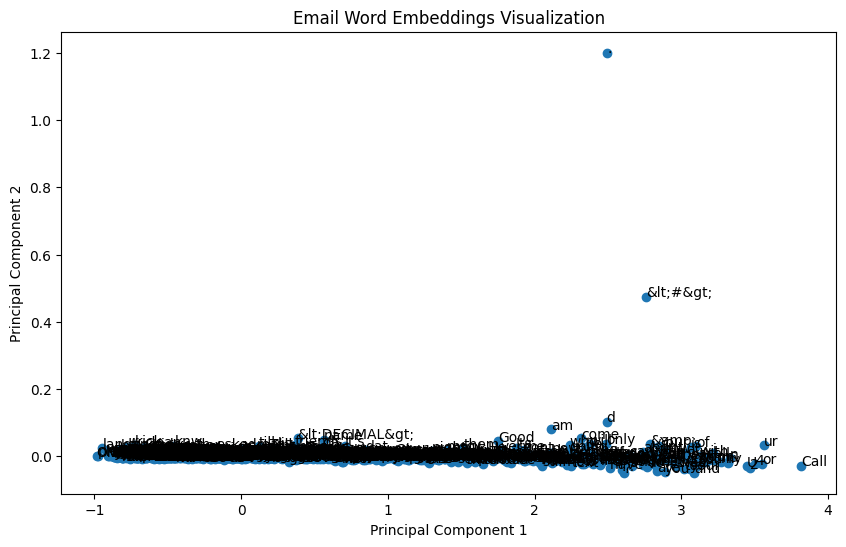

In [ ]:
def plot_word_embeddings(word2vec_model):
  words = word2vec_model.wv.index_to_key
  X = word2vec_model.wv[words]
  pca = PCA(n_components=2)
  result = pca.fit_transform(X)

  df = pd.DataFrame(result, index=words, columns=['x', 'y'])
  print(df.head())
  plt.figure(figsize=(10, 6))
  plt.scatter(df['x'], df['y'])
  for word, pos in df.iterrows():
    plt.annotate(word, pos)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('Email Word Embeddings Visualization')
  plt.show()
plot_word_embeddings(word2vec_model)
